In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-pastel')

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('spotify.csv')

#### 1.  Identify the top 5 popular artists based on the mean popularity of their tracks.Show the mean popularity of tracks for the top 5 popular artists Using BarPlot ?

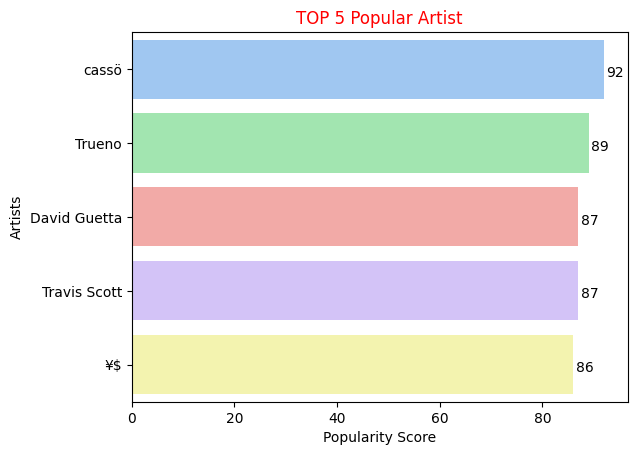

In [4]:
artist_popularity = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).astype(int).head(5)

barplot = sns.barplot(x = artist_popularity.values, y = artist_popularity.index)
for index, value in enumerate(artist_popularity.values):
    barplot.text(value + 0.5, index + 0.1, s= value)
plt.title('TOP 5 Popular Artist', color = 'red')
plt.xlabel('Popularity Score')
plt.ylabel('Artists')
plt.show()


In [5]:
artist_popularity = artist_popularity.reset_index(name='Popularity')

#### 2. . Determine the top 5 popular songs based on their popularity ratings.Display the popularity ratings of the top 5 popular songs using BarPlot.

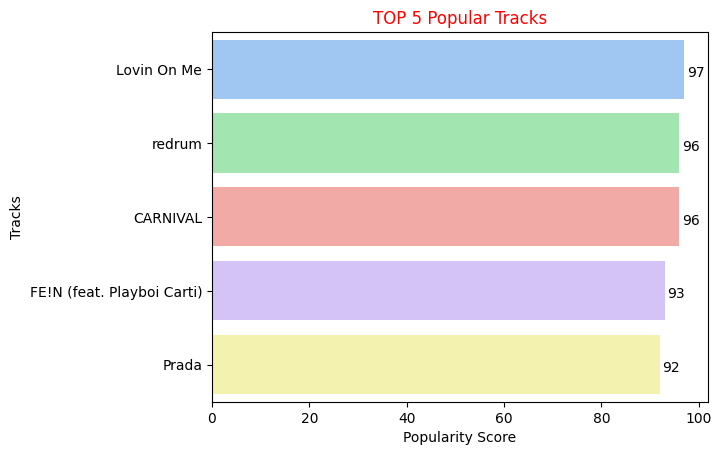

In [6]:
song_popularity = df.groupby('Track Name')['Popularity'].mean().sort_values(ascending=False).astype(int).head(5)

barplot = sns.barplot(x = song_popularity.values, y = song_popularity.index)
for index, value in enumerate(song_popularity.values):
    barplot.text(value + 0.5, index + 0.1, s= value)
plt.title('TOP 5 Popular Tracks', color = 'red')
plt.xlabel('Popularity Score')
plt.ylabel('Tracks')
plt.show()

#### 3. Find the top 5 trending genres based on the mean popularity of tracks within each genre.Visualize the mean popularity of tracks for the top 5 trending genres.

In [7]:
# genre of the songs not given in the dataset

#### 4. Identify the top 5 longest songs among the tracks of the top 5 popular artists.Represent the duration of the top 5 longest songs among the tracks of the top 5 popular artists using BarPlot

Here is the barplot of TOP 5 longest songs by top 5 Artist according to Popularity

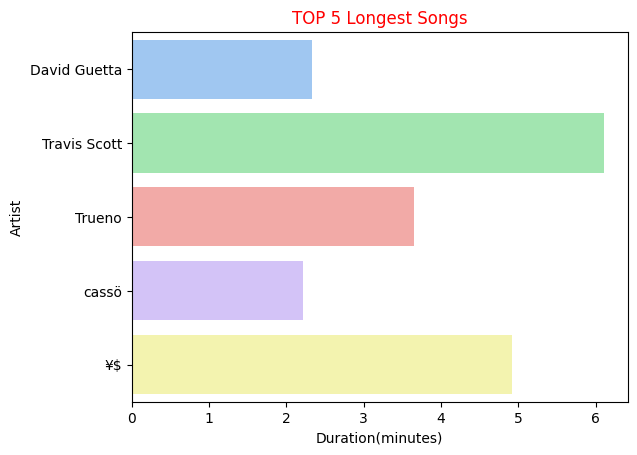

In [8]:
df['Duration(minutes)'] = (df['Duration (ms)'] / 60000).round(2)

# Filter tracks belonging to the top 5 artists
top_tracks = df[df['Artist'].isin(artist_popularity['Artist'])][['Artist', 'Track Name', 'Duration(minutes)']]
longest_songs = top_tracks.groupby('Artist').apply(lambda x : x.nlargest(1,'Duration(minutes)')).reset_index(drop=True)

sns.barplot(x = longest_songs['Duration(minutes)'], y = longest_songs['Artist'])
plt.title('TOP 5 Longest Songs', color='red')
plt.show()

#### 5. Determine the top 5 most danceable songs based on their danceability scores.Illustrate the danceability scores of the top 5 most danceable songs using PieChart.


In [9]:
# The Provided dataset does not contain any danceability feature